# Welcome to CS4243 Tutorial 1
In this tutorial, we will walk through examples to have a better understanding for some concepts that we learnt in L1&L2. 

You can opt to use images provided it the zipped folder or use your own image to run demo.

### Part 1
**Basic Operations on Images**

* Assume you have builded a new conda environment with python=3.8, then install basic python packages: imutils, opencv-python, scikit-image

In [8]:
!pip install imutils
!pip install opencv-python
!pip install matplotlib
!pip install scikit-image

In [1]:
# Import the necessary packages that will be used in the following implementation
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import color

* Load and display House.jpg

hieght=768, width=1024, depth=3
Type of image =  <class 'numpy.ndarray'>


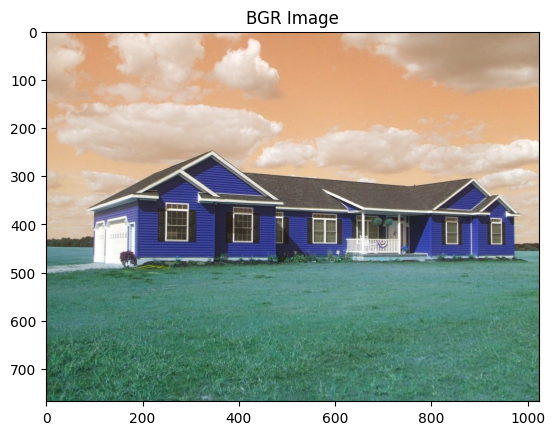

In [2]:
# Reading an Image

img = cv2.imread('Input-Files/House.jpg')
plt.title('BGR Image')
plt.imshow(img)
(h, w, d) = img.shape
print("hieght={}, width={}, depth={}".format(h, w, d))
print("Type of image = ", type(img))

Text(0.5, 1.0, 'RGB Image')

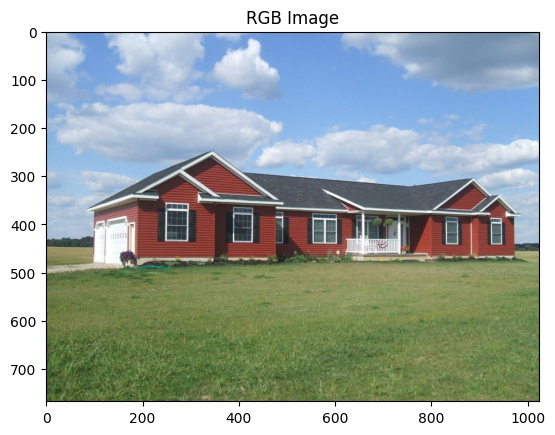

In [3]:
# Convert from BGR to RGB
############ You code here #########################
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

############ You code here #########################
plt.imshow(img)
plt.title('RGB Image')

* Show image in R,G,B colour space, respectively

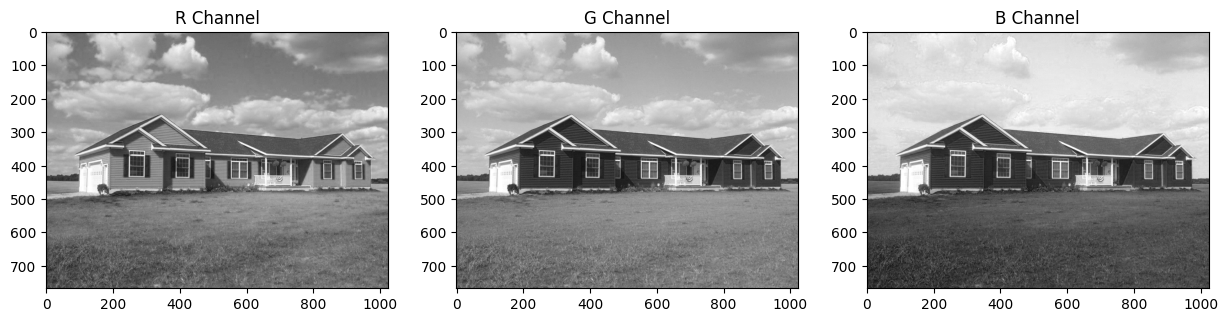

In [4]:
############ You code here #########################
img_R = img[:, :, 0]
img_G = img[:, :, 1]
img_B = img[:, :, 2]
############ You code here #########################

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title('R Channel')
plt.imshow(img_R, cmap='gray')
plt.subplot(1,3,2)
plt.title('G Channel')
plt.imshow(img_G, cmap='gray')
plt.subplot(1,3,3)
plt.title('B Channel')
plt.imshow(img_B, cmap='gray')

* Visualize the normalized color and intensity images

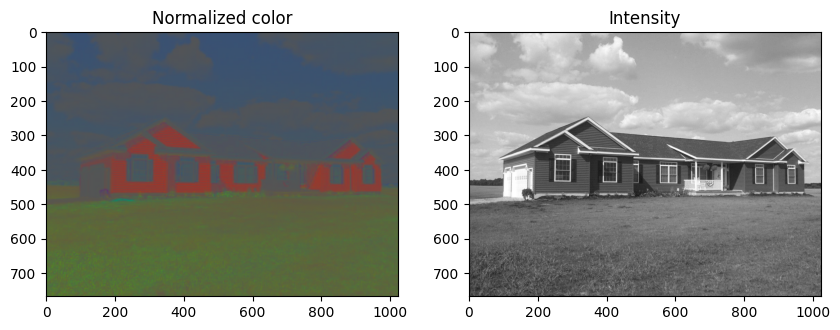

In [5]:
############ You code here #########################
r, g, b = cv2.split(img) 

im_sum = np.sum(img, axis=2)

rg_chrom_r = np.ma.divide(1.*r, im_sum)
rg_chrom_g = np.ma.divide(1.*g, im_sum)
rg_chrom_b = np.ma.divide(1.*b, im_sum)
img_color = np.zeros_like(img)

img_color[:,:,0] = np.clip(np.uint8(rg_chrom_r*255), 0, 255)
img_color[:,:,1] = np.clip(np.uint8(rg_chrom_g*255), 0, 255)
img_color[:,:,2] = np.clip(np.uint8(rg_chrom_b*255), 0, 255)

img_intensity = np.uint8(im_sum/3)

############ You code here #########################

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Normalized color')
plt.imshow(img_color)
plt.subplot(1,2,2)
plt.title('Intensity')
plt.imshow(img_intensity, cmap='gray')


* Convert RGB image into HSV colour space, and show H, S, V channels, respectively

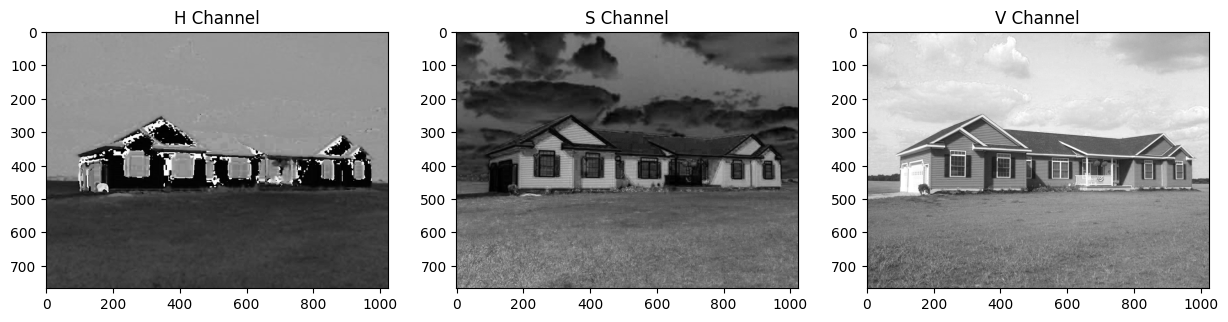

In [6]:
############ You code here #########################

img_hsv = color.rgb2hsv(img)
############ You code here #########################
img_H = img_hsv[:, :, 0]
img_S = img_hsv[:, :, 1]
img_V = img_hsv[:, :, 2]


plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title('H Channel')
plt.imshow(img_H, cmap='gray')
plt.subplot(1,3,2)
plt.title('S Channel')
plt.imshow(img_S, cmap='gray')
plt.subplot(1,3,3)
plt.title('V Channel')
plt.imshow(img_V, cmap='gray')

* Convert RGB image into grayscale

Number of dimensions of image now =  2
hieght=768, width=1024 
Image intensities channel 1 =  5 , 255


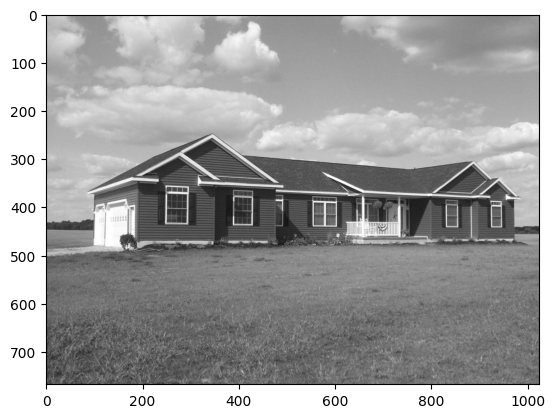

In [7]:
# Convert the image to gray scale
# For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the type of conversion
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray')
print("Number of dimensions of image now = ", img_gray.ndim)
(h, w) = img_gray.shape
print("hieght={}, width={} ".format(h, w))
print("Image intensities channel 1 = ", np.min(img_gray), ",", np.max(img_gray)) 

* Resize the greyscale image to different spatial resolutions (i.e., 2, 0.5, and 0.05 of original size)

Size of X =  768 , 1024
Size of 2X =  1536 , 1536
Size of 0.5X =  384 , 384
Size of 0.05X =  38 , 38


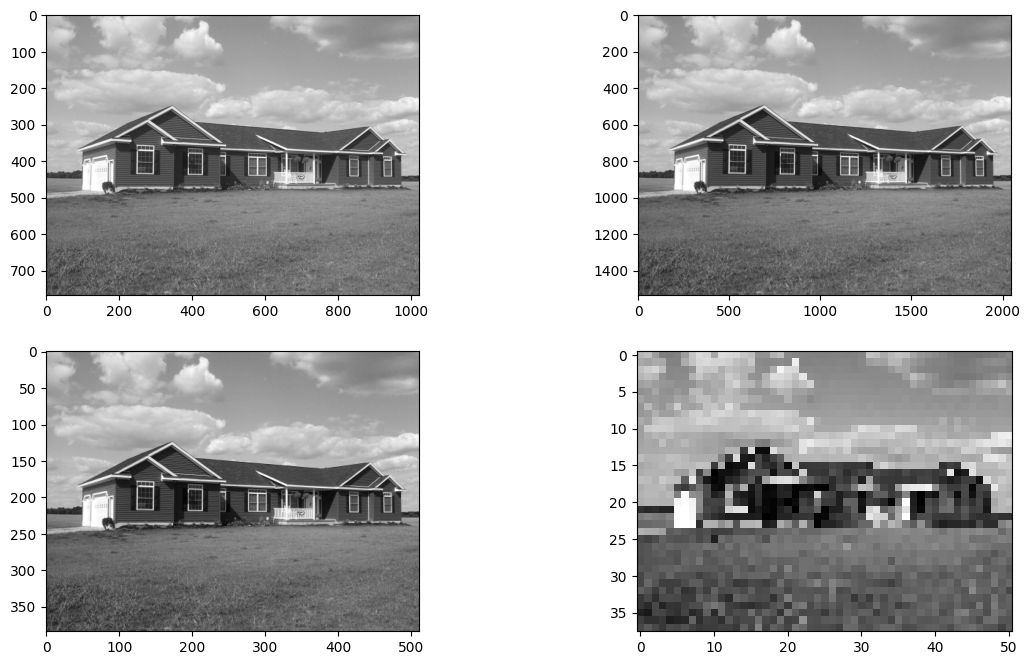

In [8]:
# Resizing the image, Spatial Resolution
# cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) → dst
plt.figure(figsize = (14,8))

img_gray1 = img_gray
plt.subplot(2, 2, 1)
plt.imshow(img_gray1, cmap = 'gray')

############ You code here #########################
img_gray2 = cv2.resize(img_gray, (int(w*2), int(h*2)))
############ You code here #########################
plt.subplot(2, 2, 2)
plt.imshow(img_gray2, cmap = 'gray')

############ You code here #########################
img_gray3 = cv2.resize(img_gray, (int(w*0.5), int(h*0.5)))
############ You code here #########################
plt.subplot(2, 2, 3)
plt.imshow(img_gray3, cmap = 'gray')

plt.subplot(2, 2, 4)
############ You code here #########################
img_gray4 = cv2.resize(img_gray, (int(w*0.05), int(h*0.05)))
############ You code here #########################
plt.imshow(img_gray4, cmap = 'gray')

print("Size of X = ", img_gray1.shape[0], ",", img_gray1.shape[1]) 
print("Size of 2X = ", img_gray2.shape[0], ",", img_gray2.shape[0]) 
print("Size of 0.5X = ", img_gray3.shape[0], ",", img_gray3.shape[0]) 
print("Size of 0.05X = ", img_gray4.shape[0], ",", img_gray4.shape[0]) 


### Part 2
**Histogram Normalization**

We will implement histogram stretching and histogram equalization.


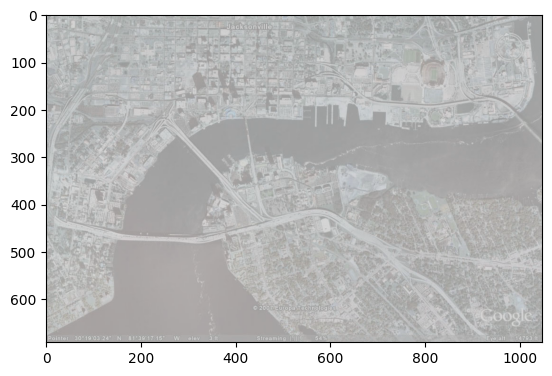

In [9]:
# Show image for histogram stretching
image1 = cv2.imread('Input-Files/Capture.jpeg')
plt.imshow(image1)

* Implement histogram stretching

In [37]:
# Implement the code of histogram stretching
# Nomarlize to 0-1, then stretch to 0-255
def hist_stretch(image):
############ You code here #########################
    maxpix = np.max(image)
    minpix = np.min(image)
    
    image = np.uint8(255.0 * (image - minpix) / (maxpix - minpix))
############ You code here #########################
    return image

* Visualize image histogram

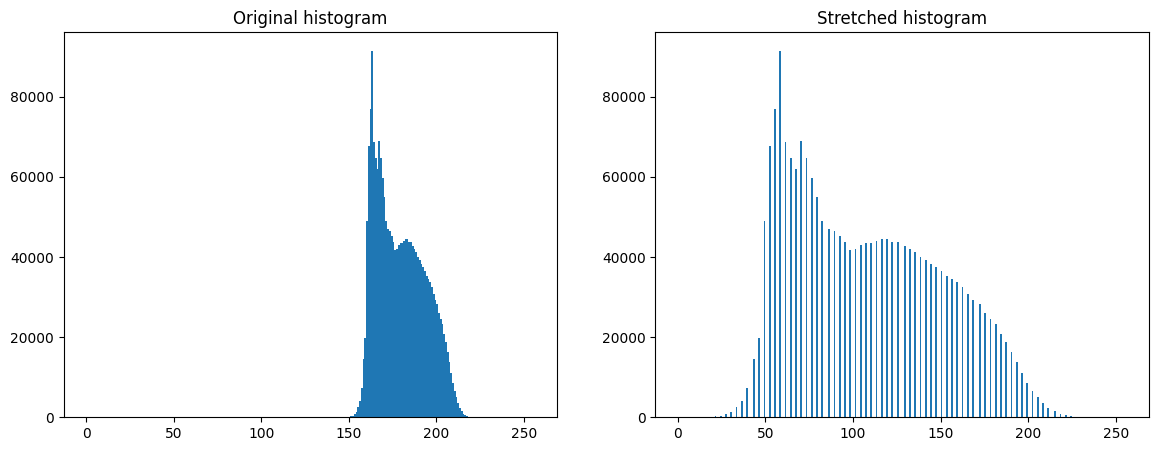

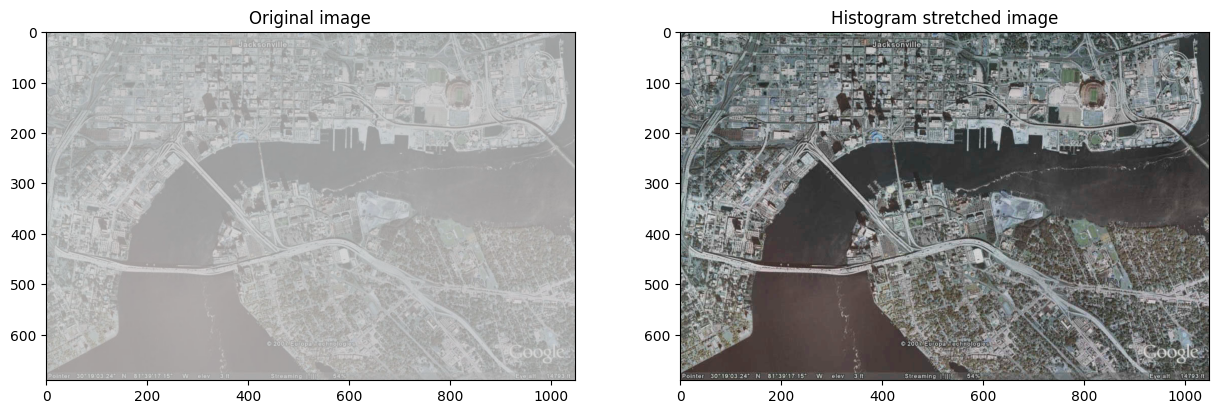

In [38]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
plt.title('Original histogram')
############ You code here #########################
plt.hist(image1.flatten(), bins=256, range=(0,256))
############ You code here #########################
plt.subplot(1,2,2)
plt.title('Stretched histogram')
############ You code here #########################
plt.hist(hist_stretch(image1).flatten(), bins=256, range=(0,256))
############ You code here #########################


plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
plt.title('Original image')
plt.imshow(image1)

plt.subplot(1,2,2)
plt.title('Histogram stretched image')
plt.imshow(hist_stretch(image1))

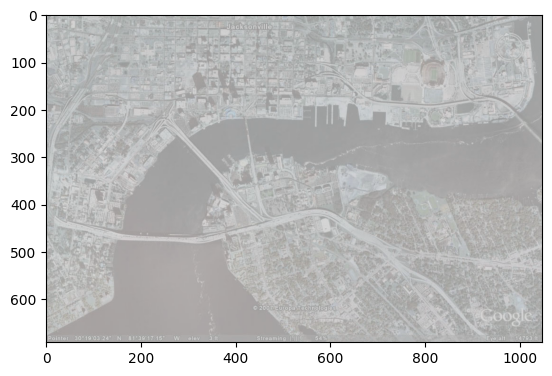

In [11]:
# Show image for histogram equalization
image2 = cv2.imread('Input-Files/Capture.jpeg')
plt.imshow(image2)

* Implement histogram equalization as described in L2 slide 13

In [12]:
# Implement the code of cumulative distribution function and histogram equalization as described in L2 slide 13
# Map each intensity to 255*cumulative_proportion


def cal_cdf(x):
    ############ You code here #########################
    hist, bins = np.histogram(x, 256, [0,256]) 
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()
    hist_max = hist.max()
    ############ You code here #########################
    
    return cdf_normalized, hist_max


def hist_equalize(image):
    ############ You code here #########################
    cdf_normalized, _ =  cal_cdf(image.flatten())
    for color in range(256):
        image = np.where(image==color, cdf_normalized[color], image)
    new_image = (image * 255.0).astype('uint8')
    ############ You code here #########################

    return new_image




* Visualize image histogram

Start Image = [4, 7, 4, 10, 15, 15]
calculating Histogram: [2, 1, 1, 2], [4, 7, 10, 15] --- np.histogram

Calculating CDF: [2, 3, 4, 6], [4, 7, 10, 15] --- .cumsum()

Normalizing CDF Values: [2/6, 3/6, 4/6, 6/6], [4, 7, 10, 15] -- /max()

New Values of Image pixels: [0.3, 0.5, 0.7, 1], [4, 7, 10, 15]

Substituting Values in the New image: [0.3, 0.5, 0.3, 0.7, 1, 1] np.where()

Converting Image to Uint: [76, 127, 76, 178, 255, 255]

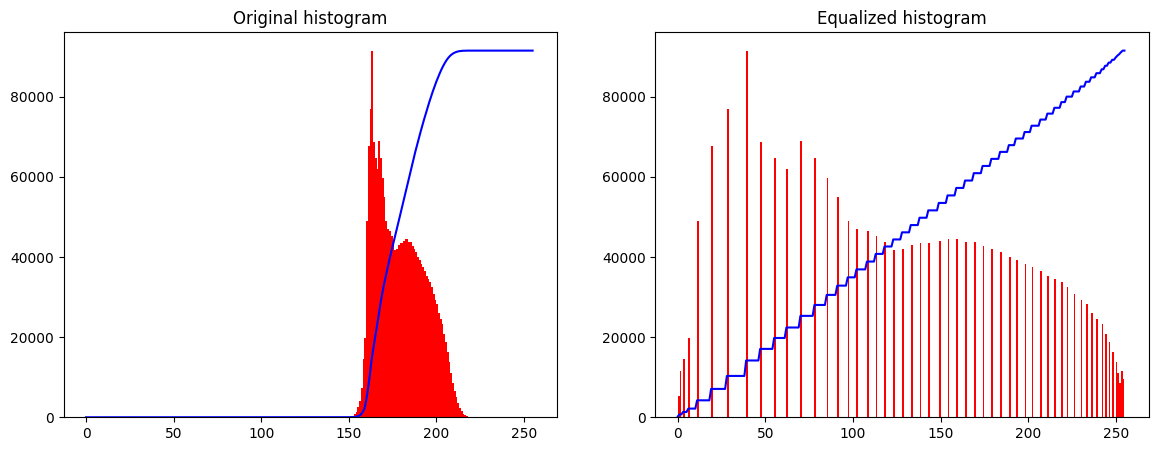

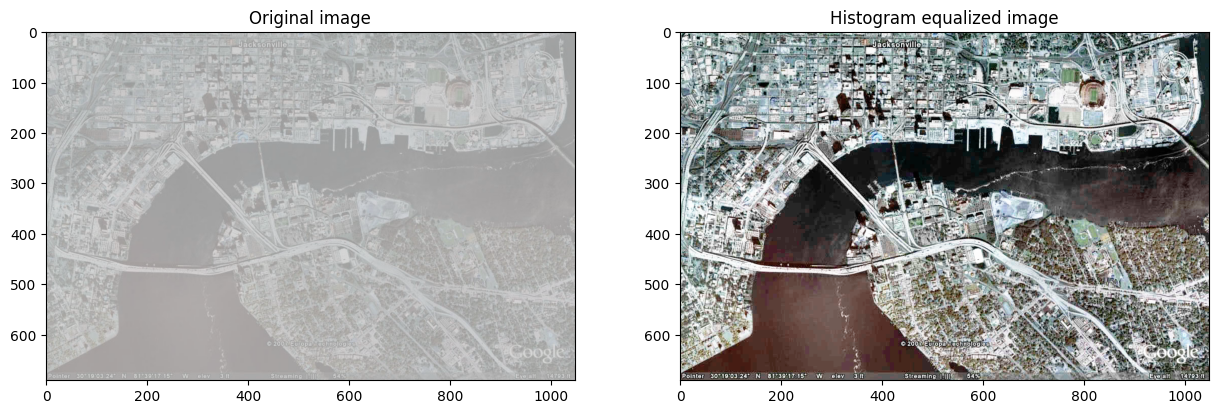

In [13]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
plt.title('Original histogram')
cdf_normalized, hist_max =  cal_cdf(image2.flatten())
plt.plot(cdf_normalized * hist_max, color = 'b')
############ You code here #########################
#histogram visualzation
plt.hist(image2.flatten(), 256, [0,256], color = 'r')
############ You code here #########################

plt.subplot(1,2,2)
plt.title('Equalized histogram')
image2_equalized = hist_equalize(image2)
cdf_normalized, hist_max =  cal_cdf(image2_equalized.flatten())
############ You code here #########################
#histogram visualzation
plt.plot(cdf_normalized * hist_max, color = 'b')
############ You code here #########################
plt.hist(image2_equalized.flatten(), 256, [0,256], color = 'r')

plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
plt.title('Original image')
plt.imshow(image2)

plt.subplot(1,2,2)
plt.title('Histogram equalized image')
plt.imshow(image2_equalized)

(array([ 3587.,  5941.,  7380.,  3344.,  4203., 12726.,  6631.,  7605.,
            0.,     0.,     0., 17123., 17197., 14755.,     0.,     0.,
            0.,     0., 21865.,     0., 21242., 24489.,     0.,     0.,
            0.,     0.,     0., 20782., 26618.,     0.,     0., 29495.,
            0.,     0., 19578.,     0.,     0.,     0.,     0., 14477.,
        34063.,     0.,     0.,     0., 37892.,     0., 18618.,     0.,
            0., 27452.,     0.,     0., 18000.,     0., 26773.,     0.,
            0., 22637.,     0.,     0.,     0., 24786., 23359.,     0.,
            0., 21329.,     0.,     0.,     0.,     0., 47069.,     0.,
            0., 21781.,     0.,     0.,     0.,     0., 45079.,     0.,
        19828.,     0.,     0.,     0.,     0., 41825., 19003.,     0.,
            0.,     0.,     0., 17998.,     0., 39248.,     0.,     0.,
            0., 15545., 14606.,     0., 20950.,     0., 26355.,     0.,
            0.,     0., 13004., 12875., 21355.,     0., 12266., 

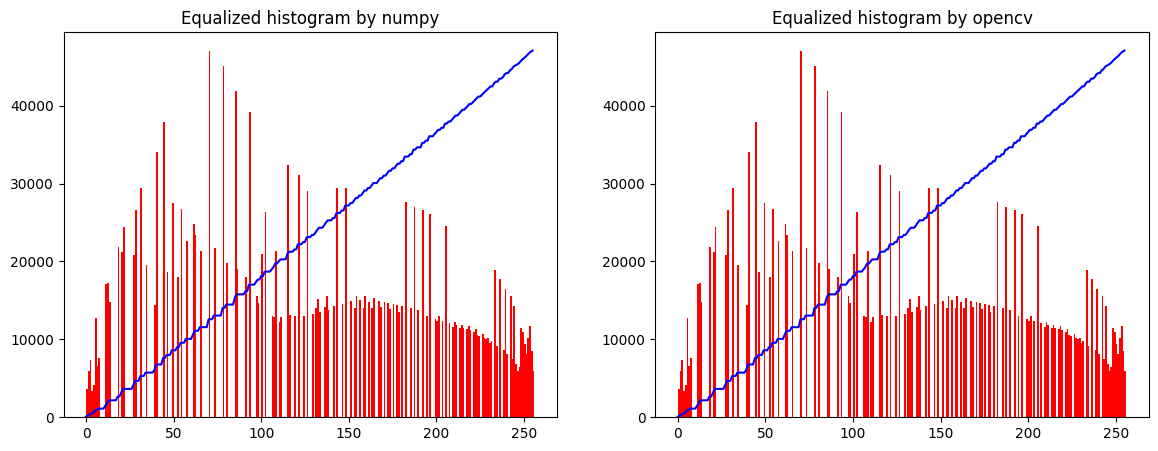

In [14]:
# Compare with the built-in cv2.equalizeHist and try to find out why if there is a difference 
############ You code here #########################
def hist_equal(x):
    h_x, bin_x = np.histogram(x.flatten(), 256, [0, 256])
    cdf_x = np.cumsum(h_x) 
    cdf_m_x = np.ma.masked_equal(cdf_x,0)
    cdf_m_x = np.rint((cdf_m_x - cdf_m_x.min())*255/(cdf_m_x.max()-cdf_m_x.min()))
    cdf_final_x = np.ma.filled(cdf_m_x,0).astype('uint8')

    final_x = cdf_final_x[x]

    return final_x



b,g,r = cv2.split(image2)
# image2_equalized_cv = cv2.equalizeHist(image2)
equ_b = cv2.equalizeHist(b)
equ_g = cv2.equalizeHist(g)
equ_r = cv2.equalizeHist(r)
image2_equalized_cv = cv2.merge((equ_b, equ_g, equ_r))

# segregate color streams
b,g,r = cv2.split(image2)

img_b = hist_equal(b)
img_g = hist_equal(g)
img_r = hist_equal(r)

img_out = cv2.merge((img_b, img_g, img_r))

plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
plt.title('Equalized histogram by numpy')
cdf_normalized, hist_max =  cal_cdf(img_out.flatten())
plt.plot(cdf_normalized * hist_max, color = 'b')
plt.hist(img_out.flatten(), 256, [0,256], color = 'r')

plt.subplot(1,2,2)
plt.title('Equalized histogram by opencv')
cdf_normalized, hist_max =  cal_cdf(image2_equalized_cv.flatten())
plt.plot(cdf_normalized * hist_max, color = 'b')
plt.hist(image2_equalized_cv.flatten(), 256, [0,256], color = 'r')

############ You code here #########################


* Access a pixel or window of data in an image

It looks like the stadium is near the pixcel [100, 800], can you show the cropped image of stadiuum? Can you compare the pixcel vaule of [100, 800] before and after histogram equalization? 

Before histogram equalization: [159 160 158]
After histogram equalization: [ 6 11  3]


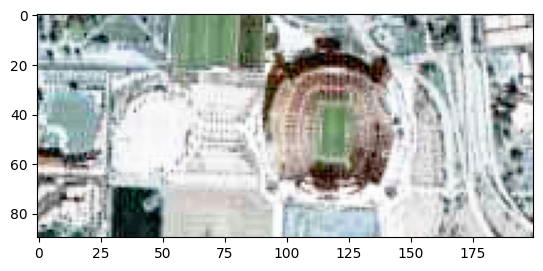

In [28]:
############ You code here #########################

plt.imshow(image2_equalized[80:170, 700:900,:], cmap='gray')

print('Before histogram equalization:', image2[100, 800, :])
print('After histogram equalization:', image2_equalized[100, 800, :])
############ You code here #########################

### Part 3
**Image Filtering** 

We will show some examples of kernel filtering, which includes gaussian kernel, box kernel, and sharpening kernel.

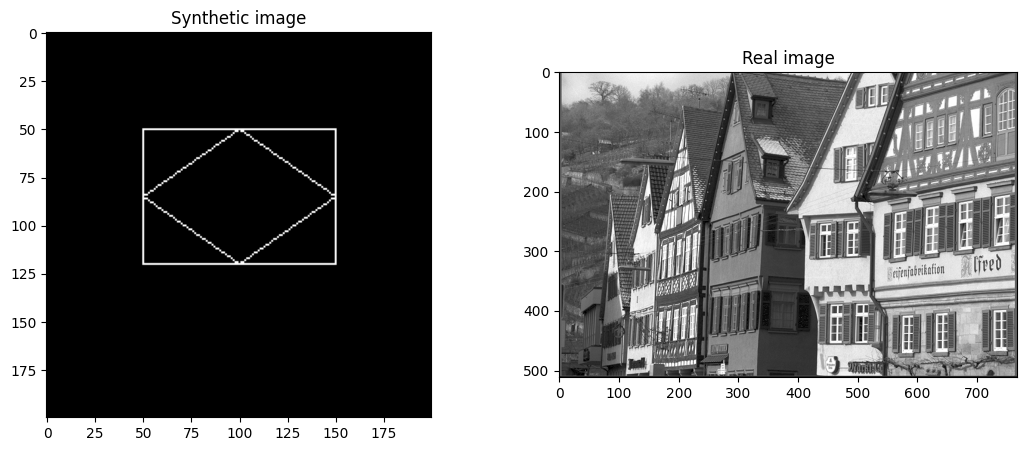

In [16]:
syn_img = cv2.imread('Input-Files/Synthetic.png')
real_img = cv2.imread('Input-Files/Building.png')

plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
plt.title('Synthetic image')
plt.imshow(syn_img, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('Real image')
plt.imshow(real_img, cmap = 'gray')

In [18]:
# implement Gaussian kernel(use built-in function) and box kernel

def get_gaussian_kernel(kernel_size, sigma):
    ############ You code here #########################
    kernel_1d = cv2.getGaussianKernel(kernel_size, sigma)
    gaussian_kernel = np.multiply(kernel_1d.T, kernel_1d)
    ############ You code here #########################
    return gaussian_kernel

def get_box_kernel(kernel_size):
    ############ You code here #########################
    box_kernel = np.ones((kernel_size,kernel_size), np.float32)*(1/(kernel_size**2))
    ############ You code here #########################
    return box_kernel

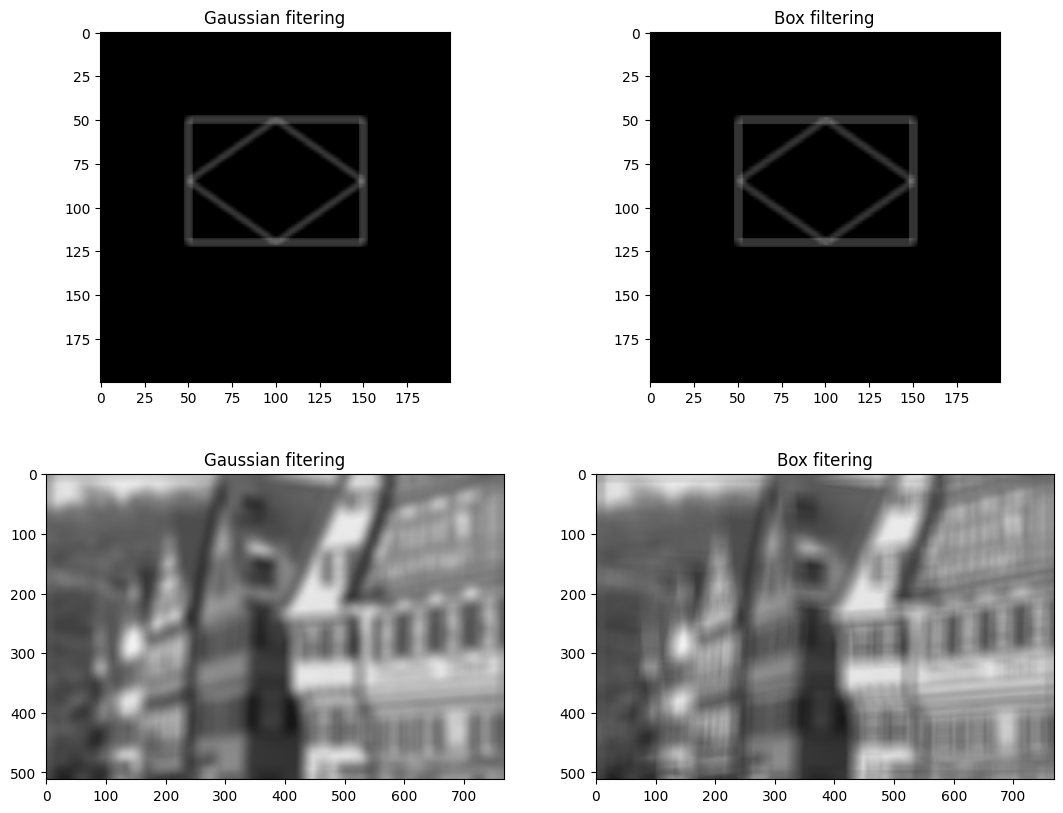

In [19]:
gaussian_k_1 = get_gaussian_kernel(30,10)
# implement box filter
box_k_1 = get_box_kernel(30)

gaussian_k_2 = get_gaussian_kernel(5,3)
# implement box filter
box_k_2 = get_box_kernel(5)

# Apply gaussian kernel on images
syn_gaussian = cv2.filter2D(syn_img, -1, gaussian_k_2)
real_gaussian = cv2.filter2D(real_img, -1, gaussian_k_1)

# Apply box kernel on images
syn_box = cv2.filter2D(syn_img, -1, box_k_2)
real_box = cv2.filter2D(real_img, -1, box_k_1)

plt.figure(figsize=(13, 10))
plt.subplot(2,2,1)
plt.title('Gaussian fitering')
plt.imshow(syn_gaussian)
plt.subplot(2,2,2)
plt.title('Box filtering')
plt.imshow(syn_box)
plt.subplot(2,2,3)
plt.title('Gaussian fitering')
plt.imshow(real_gaussian)
plt.subplot(2,2,4)
plt.title('Box fitering')
plt.imshow(real_box)

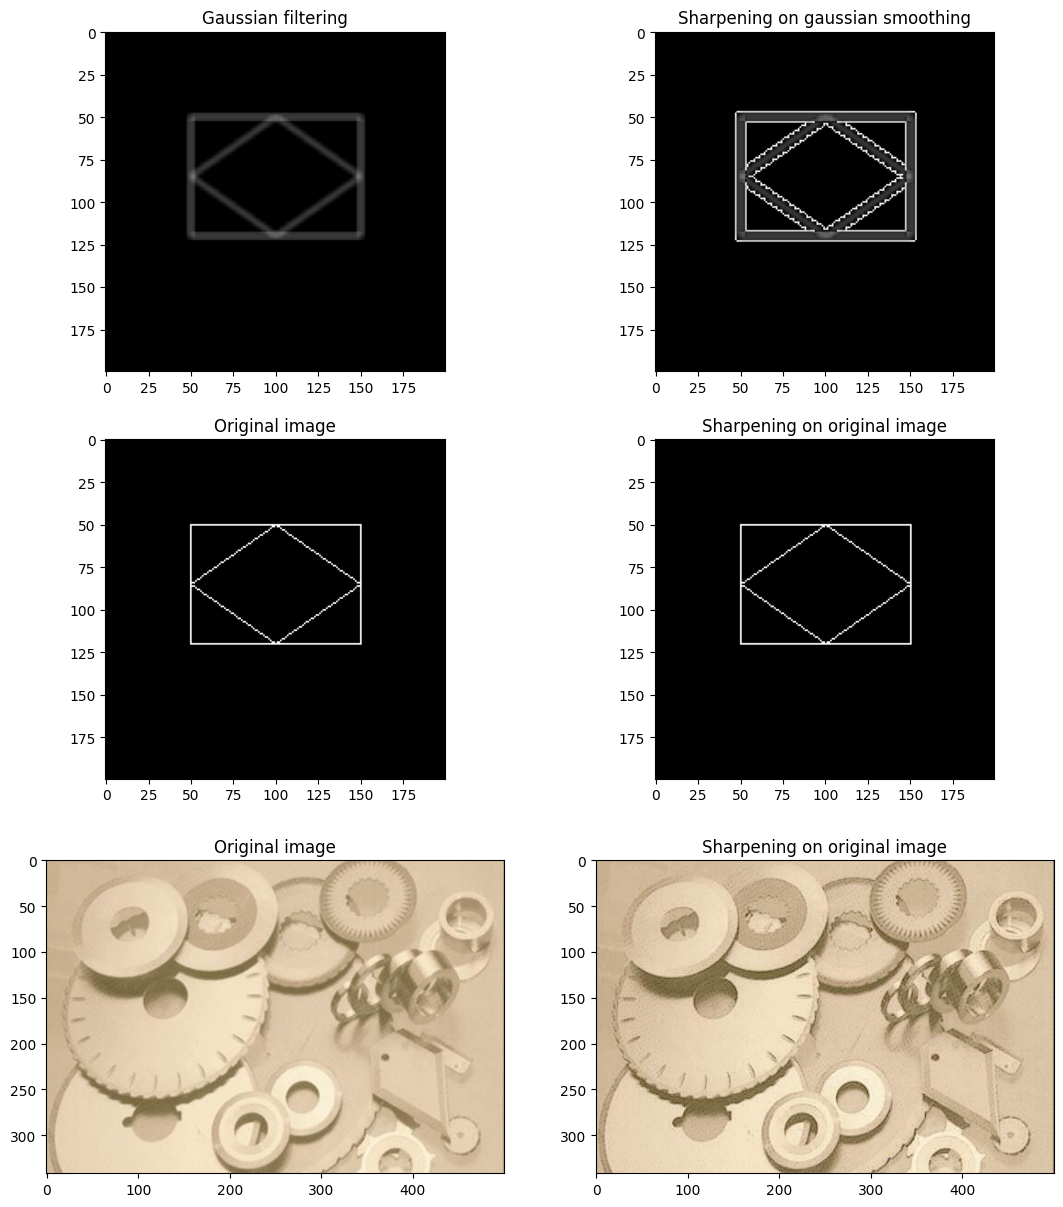

In [20]:
# Implement sharpening kernel
############ You code here #########################
sharpen_k = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])
############ You code here #########################

syn_gaussian_sharpen = syn_gaussian - cv2.filter2D(syn_gaussian, -1, sharpen_k)

syn_sharpen = syn_img - cv2.filter2D(syn_img, -1, sharpen_k)
# Apply a sharpening filter on real image
image4 = cv2.imread('Input-Files/Sharpen.jpeg')
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
image4_sharpen = image4 - cv2.filter2D(image4,-1, sharpen_k)

plt.figure(figsize=(13, 15))
plt.subplot(3,2,1)
plt.title('Gaussian filtering')
plt.imshow(syn_gaussian)
plt.subplot(3,2,2)
plt.title('Sharpening on gaussian smoothing')
plt.imshow(syn_gaussian_sharpen)
plt.subplot(3,2,3)
plt.title('Original image')
plt.imshow(syn_img)
plt.subplot(3,2,4)
plt.title('Sharpening on original image')
plt.imshow(syn_sharpen)
plt.subplot(3,2,5)
plt.title('Original image')
plt.imshow(image4)
plt.subplot(3,2,6)
plt.title('Sharpening on original image')
plt.imshow(image4_sharpen)